In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

In [3]:
def get_gaps(file_names, gaps, x_vals):
    for file_name in file_names:
        with open(file_name,'rb') as f:
            M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        Q_paths_M = M_res["Q_paths"]
        C_paths_M = M_res["C_paths"]
        Q_paths_B = B_res["Q_paths"]
        C_paths_B = B_res["C_paths"]

        # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
        (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
        (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
        # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
        cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
        gaps = np.append( gaps, [cB - cM] )
        x_vals = np.append(x_vals, [np.var(W)/np.mean(W)])
        return ( [gaps, x_vals] )

In [4]:
def get_gaps_nonU(file_names, gaps, x_vals):
    for file_name in file_names:
        with open(file_name,'rb') as f:
            M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        cost_pmf = np.outer(pmf_cust,pmf_serv).ravel()
        weights = W.ravel()

        mean_cost = sum(cost_pmf*weights)
        variance_cost = sum(cost_pmf*(weights**2)) - mean_cost**2
        
        Q_paths_M = M_res["Q_paths"]
        C_paths_M = M_res["C_paths"]
        Q_paths_B = B_res["Q_paths"]
        C_paths_B = B_res["C_paths"]

        # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
        (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
        (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
        # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
        cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
        gaps = np.append( gaps, [cB - cM] )
        x_vals = np.append(x_vals, [variance_cost/mean_cost])
    return ( [gaps, x_vals] )

### Gather all file names

N = 16

In [59]:
file_names = []
indicator = []
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
for w in weights:
    file_names.append("../sim_paths_spatial_uniform_16_W_"+ str(w) + '_new.pkl' )
    indicator.append(0)

In [60]:
len(file_names) == len(indicator)

True

Original files used for this plot

In [61]:
# Increased diagonal weights
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
for w in weights:
    file_names.append( "../sim_paths_spatial_uniform_9_W_" + str(w) + '.pkl' )
    indicator.append(1)
for w in weights:
    file_names.append( "../sim_paths_spatial_uniform_4_W_" + str(w) + '.pkl' )
    indicator.append(2)

# Also including (not included as part of original files before) longest spatial
file_names.append("longest_spatial_uniform_4.pkl")
indicator.append(3)
file_names.append("longest_spatial_uniform_9.pkl")
indicator.append(3)

In [62]:
len(file_names) == len(indicator)

True

June

In [63]:
# June results
# Probab curve simulations so all have weird PMFs
for i in range(9):
    file_names.append( "../probab_curve_50k/sim_paths_prob_curve" + str(i) + '.pkl' )
    indicator.append(4)

In [64]:
len(file_names) == len(indicator)

True

Spring 2024

In [65]:
file_names = file_names + ["../sim_paths_spatial_uniform_4.pkl", "../sim_paths_spatial_uniform_9.pkl"]
indicator = indicator + [5,5]
file_names = file_names + ["../sim_paths_random_4.pkl", "../sim_paths_random_2.pkl", "../sim_paths_random_5.pkl", "../sim_paths_random_4_random_pmf.pkl"]
indicator = indicator + [6,6,6,6]
file_names = file_names + ["../sim_paths_spatial_scale_10_rerun.pkl", "../sim_paths_spatial_scale_16.pkl"]
indicator = indicator + [7,7]

### Get Gaps
Lazy so I am just calling get_gap_nonU for everything

In [66]:
gaps = np.array([])
x_vals = np.array([])


In [67]:
len(file_names) == len(indicator)

True

In [68]:
[gaps, x_vals] = get_gaps_nonU(file_names, gaps, x_vals)

In [78]:
values = ["N=16,D_w", "N=9,D_w", "N=4,D_w","longest","PC","Base_N=4,9","Rwts_N","scale"]
new_ind = [values[i] for i in indicator]
print(new_ind)

['N=16,D_w', 'N=16,D_w', 'N=16,D_w', 'N=16,D_w', 'N=16,D_w', 'N=16,D_w', 'N=9,D_w', 'N=9,D_w', 'N=9,D_w', 'N=9,D_w', 'N=9,D_w', 'N=9,D_w', 'N=4,D_w', 'N=4,D_w', 'N=4,D_w', 'N=4,D_w', 'N=4,D_w', 'N=4,D_w', 'longest', 'longest', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'Base_N=4,9', 'Base_N=4,9', 'Rwts_N', 'Rwts_N', 'Rwts_N', 'Rwts_N', 'scale', 'scale']


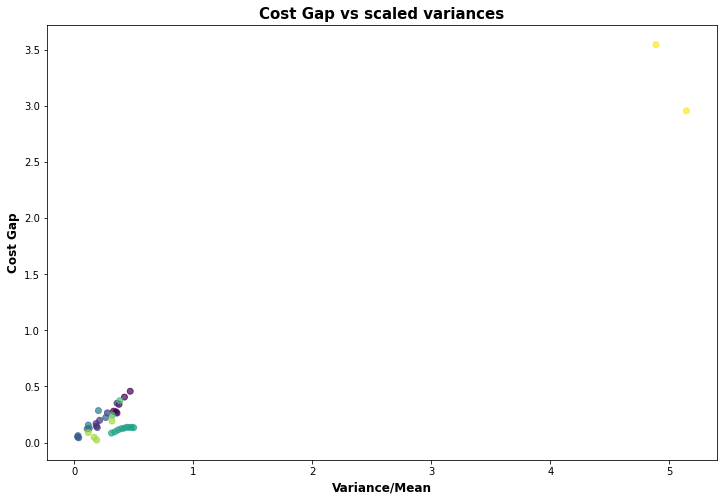

In [99]:
plt.figure( figsize=(12,8) )

scatter = plt.scatter(x_vals, gaps, c=indicator, cmap='viridis', alpha=0.7)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.legend(loc="lower left",ncol=1)
plt.show()

In [105]:
import seaborn as sns
import pandas as pd
data = pd.DataFrame({'x_vals':x_vals,'Cost_Gap':gaps,'class':new_ind,'indicator':indicator})
data.head()

,x_vals,Cost_Gap,class,indicator
0,0.468340,0.457256,"N=16,D_w",0
1,0.420261,0.405708,"N=16,D_w",0
2,0.374529,0.340720,"N=16,D_w",0
3,0.357443,0.262804,"N=16,D_w",0
4,0.348271,0.274566,"N=16,D_w",0


In [106]:
len(data)

37

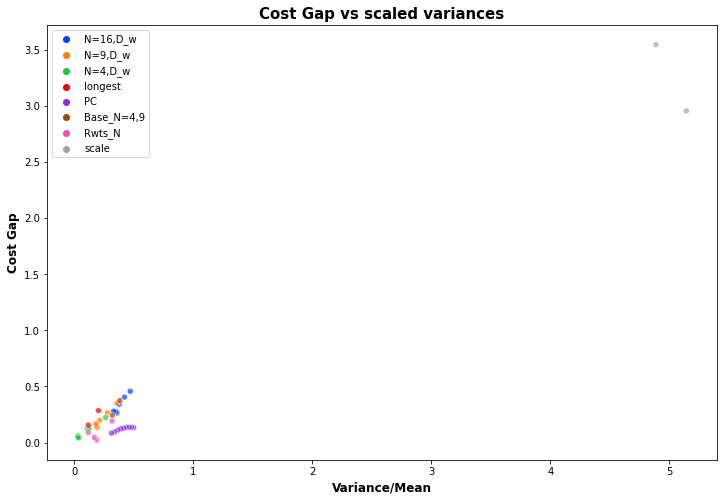

In [107]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x='x_vals', y='Cost_Gap', hue=new_ind, palette='bright', alpha=0.7)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.legend(loc="lower left",ncol=1)
plt.show()

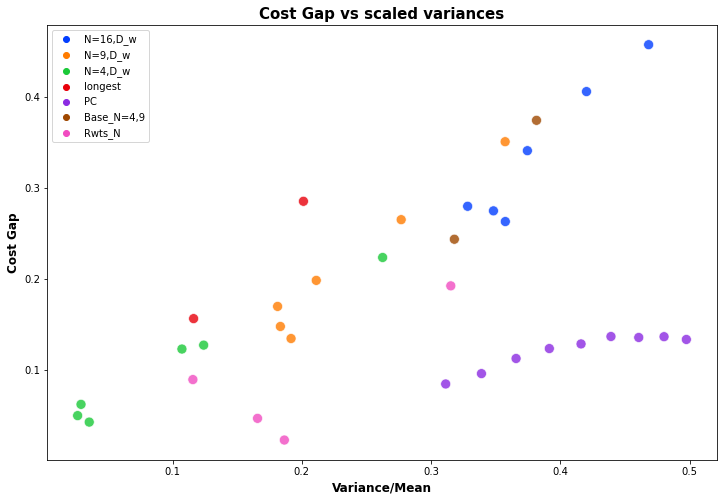

In [102]:
lval = 35
data = pd.DataFrame({'x_vals':x_vals[:lval],'Cost_Gap':gaps[:lval],'class':new_ind[:lval]})
data.head()
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x='x_vals', y='Cost_Gap', hue=new_ind[:lval], hue_norm=(0,255), palette='bright', alpha=0.8, s=100)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.legend(loc="lower left",ncol=1)
plt.show()

Text(0.5, 1.0, 'Cost Gap vs scaled variances')

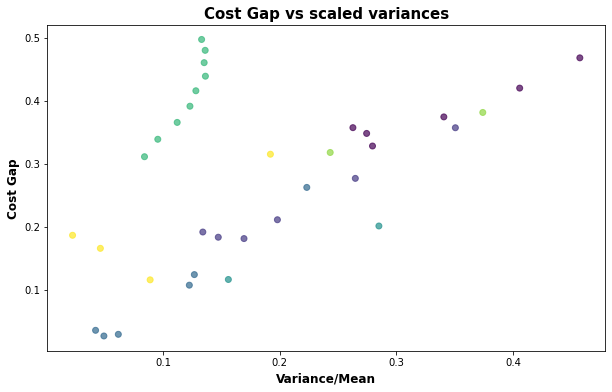

In [74]:
lval = 35
plt.figure( figsize=(10,6) )
plt.scatter(x_vals[:lval],gaps[:lval], c=indicator[:lval], cmap='viridis', alpha=0.7)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)

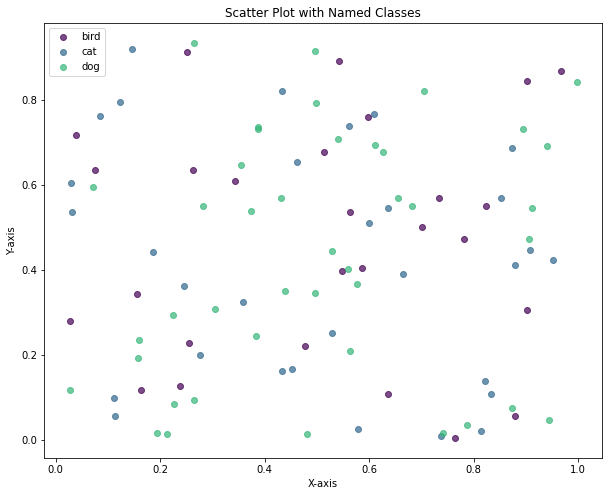

In [70]:
import pickle as pkl
with open("../gaps_data.pkl","wb") as f:
    pkl.dump([gaps,x_vals,indicator],f)

In [71]:
with open("../gaps_data.pkl","rb") as f:
   [gaps_loaded,x_vals_loaded,indicator_loaded] = pkl.load(f)

Text(0.5, 1.0, 'Cost Gap vs scaled variances')

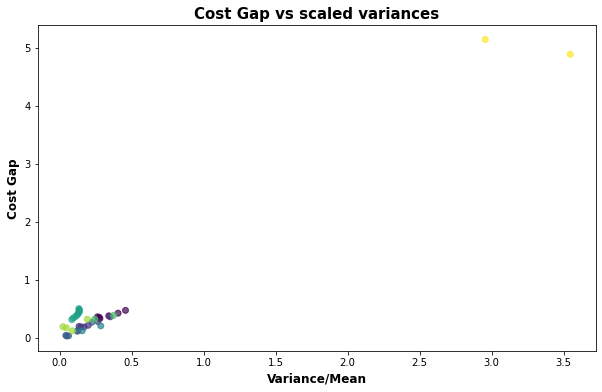

In [72]:
plt.figure( figsize=(10,6) )
plt.scatter(gaps_loaded, x_vals_loaded, c=indicator_loaded, cmap='viridis', alpha=0.7)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)

I think the scaled plots are the ones with high gaps

Text(0.5, 1.0, 'Cost Gap vs scaled variances')

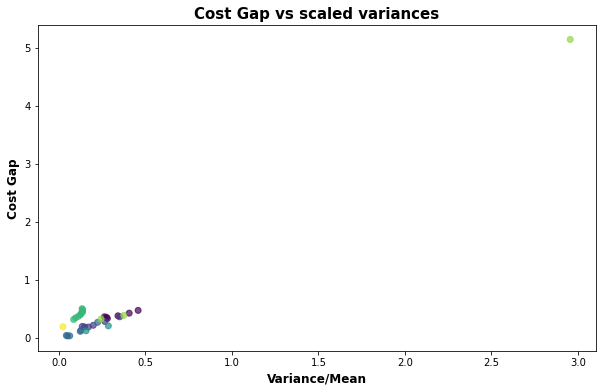

In [54]:
lval = 33
plt.figure( figsize=(10,6) )
plt.scatter(gaps_loaded[:lval], x_vals_loaded[:lval], c=indicator_loaded[:lval], cmap='viridis', alpha=0.7)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)

In [52]:
len(indicator)

38

In [108]:
data[-2:]

,x_vals,Cost_Gap,class,indicator
35,5.142131,2.955938,scale,7
36,4.886308,3.546097,scale,7


In [113]:
file_name = "../sim_paths_spatial_scale_10_rerun.pkl" 

# "../sim_paths_spatial_scale_16.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [114]:
print(W)

[[ 0.         10.         20.         30.         10.         14.14213562
  22.36067977 31.6227766  20.         22.36067977 28.28427125 36.05551275
  30.         31.6227766  36.05551275 42.42640687]
 [10.          0.         10.         20.         14.14213562 10.
  14.14213562 22.36067977 22.36067977 20.         22.36067977 28.28427125
  31.6227766  30.         31.6227766  36.05551275]
 [20.         10.          0.         10.         22.36067977 14.14213562
  10.         14.14213562 28.28427125 22.36067977 20.         22.36067977
  36.05551275 31.6227766  30.         31.6227766 ]
 [30.         20.         10.          0.         31.6227766  22.36067977
  14.14213562 10.         36.05551275 28.28427125 22.36067977 20.
  42.42640687 36.05551275 31.6227766  30.        ]
 [10.         14.14213562 22.36067977 31.6227766   0.         10.
  20.         30.         10.         14.14213562 22.36067977 31.6227766
  20.         22.36067977 28.28427125 36.05551275]
 [14.14213562 10.         14.1

In [115]:
file_name = "../sim_paths_spatial_scale_16.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N2, W2, pmf_cust2, pmf_serv2 = pickle.load(f)

In [116]:
print(W)

[[ 0.         10.         20.         30.         10.         14.14213562
  22.36067977 31.6227766  20.         22.36067977 28.28427125 36.05551275
  30.         31.6227766  36.05551275 42.42640687]
 [10.          0.         10.         20.         14.14213562 10.
  14.14213562 22.36067977 22.36067977 20.         22.36067977 28.28427125
  31.6227766  30.         31.6227766  36.05551275]
 [20.         10.          0.         10.         22.36067977 14.14213562
  10.         14.14213562 28.28427125 22.36067977 20.         22.36067977
  36.05551275 31.6227766  30.         31.6227766 ]
 [30.         20.         10.          0.         31.6227766  22.36067977
  14.14213562 10.         36.05551275 28.28427125 22.36067977 20.
  42.42640687 36.05551275 31.6227766  30.        ]
 [10.         14.14213562 22.36067977 31.6227766   0.         10.
  20.         30.         10.         14.14213562 22.36067977 31.6227766
  20.         22.36067977 28.28427125 36.05551275]
 [14.14213562 10.         14.1

In [117]:
W2 - W

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [118]:
N2 

16

In [119]:
pmf_cust

array([0.095886  , 0.064833  , 0.02011467, 0.10579828, 0.06332473,
       0.06126731, 0.03189242, 0.02230265, 0.05465714, 0.09789766,
       0.00486615, 0.07277437, 0.09431652, 0.04608176, 0.1115095 ,
       0.05247784])

In [120]:
pmf_cust2

array([0.07632258, 0.04416851, 0.06035114, 0.09632552, 0.04445993,
       0.00653104, 0.10674206, 0.03118331, 0.09051541, 0.04553928,
       0.09873315, 0.00951475, 0.07374131, 0.04462872, 0.09551354,
       0.07572974])